In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/workspaces/Machine_Learning_in_Python/Projects/Titanic Survivor Prediction/dataset/Train.csv')
test_df = pd.read_csv('/workspaces/Machine_Learning_in_Python/Projects/Titanic Survivor Prediction/dataset/Test.csv')

In [51]:
df.shape, test_df.shape

((1009, 14), (300, 13))

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [32]:
# find if duplicate data is present
print(df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     300 non-null    float64
 1   name       300 non-null    object 
 2   sex        300 non-null    object 
 3   age        234 non-null    float64
 4   sibsp      300 non-null    float64
 5   parch      300 non-null    float64
 6   ticket     300 non-null    object 
 7   fare       300 non-null    float64
 8   cabin      66 non-null     object 
 9   embarked   299 non-null    object 
 10  boat       112 non-null    object 
 11  body       23 non-null     float64
 12  home.dest  163 non-null    object 
dtypes: float64(6), object(7)
memory usage: 30.6+ KB


In [34]:
combine = [df,test_df]

In [35]:
for dataset in combine:
    dataset['sex'] = dataset['sex'].map({'female' : 1, 'male' : 0})

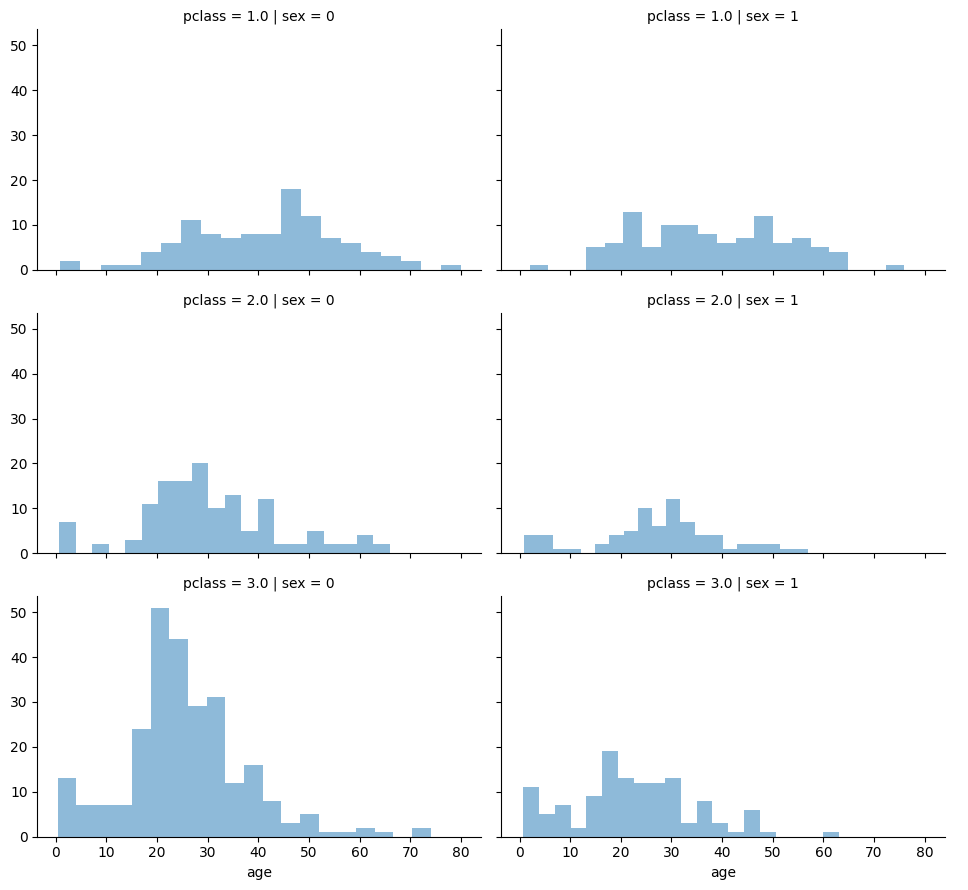

In [15]:
grid = sns.FacetGrid(df,row='pclass',col='sex', aspect=1.6)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend()

In [23]:
guess_age = np.zeros((2,3))

In [44]:
for dataset in combine:    
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['sex'] == i ) & (dataset['pclass'] == j+1 )]['age'].dropna()

            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_age[i,j] = int(age_guess/0.5 +0.5)*0.5

    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.age.isnull()) & (dataset.sex == i) & (dataset.pclass == j+1 ), 'age'] = guess_age[i,j]

    dataset['age'] = dataset['age'].astype(int)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",1,22,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",0,39,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",1,40,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,31,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",1,22,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   int64  
 4   age        1009 non-null   int64  
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(6), int64(2), object(6)
memory usage: 110.5+ KB


In [46]:
print(df['embarked'].value_counts())

# Find the mode of train_df['embarked]
freq_port = df.embarked.dropna().mode()[0]
print(freq_port)

embarked
S    712
C    203
Q     93
Name: count, dtype: int64
S


In [47]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(freq_port)

In [49]:
# converting categorical to numeric

for dataset in combine:
    dataset['embarked'] = dataset['embarked'].map({"S":1 , "C":2, "Q":3 })

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",1,22,0.0,0.0,364856,7.750,NaN,3,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",0,39,0.0,0.0,250655,26.000,NaN,1,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",1,40,0.0,0.0,31418,13.000,NaN,1,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,31,1.0,1.0,363291,20.525,NaN,1,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",1,22,2.0,0.0,367226,23.250,NaN,3,16,NaN,NaN


In [50]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')